In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [20]:
df=pd.read_csv('fraud_check.csv')

In [21]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [35]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [36]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_1,Marital.Status_1,Marital.Status_2,Urban_1
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [37]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [38]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_1,Marital.Status_1,Marital.Status_2,Urban_1,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [39]:
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [41]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_1,Marital.Status_1,Marital.Status_2,Urban_1,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [42]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [43]:
df_norm = norm_func(df.iloc[:,1:])

In [44]:
df_norm.head()

,City.Population,Work.Experience,Undergrad_1,Marital.Status_1,Marital.Status_2,Urban_1,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


In [47]:
x = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [48]:
x

,City.Population,Work.Experience,Undergrad_1,Marital.Status_1,Marital.Status_2,Urban_1
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [49]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [50]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [51]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.40000000000003, 190.26, 'X[0] <= 0.22\nentropy = 0.722\nsamples = 480\nvalue = [96, 384]'),
 Text(100.44000000000001, 135.9, 'X[1] <= 0.783\nentropy = 0.537\nsamples = 106\nvalue = [13, 93]'),
 Text(66.96000000000001, 81.53999999999999, 'X[0] <= 0.082\nentropy = 0.635\nsamples = 81\nvalue = [13, 68]'),
 Text(33.480000000000004, 27.180000000000007, 'entropy = 0.811\nsamples = 36\nvalue = [9, 27]'),
 Text(100.44000000000001, 27.180000000000007, 'entropy = 0.433\nsamples = 45\nvalue = [4, 41]'),
 Text(133.92000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(234.36, 135.9, 'X[0] <= 0.223\nentropy = 0.764\nsamples = 374\nvalue = [83, 291]'),
 Text(200.88000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(267.84000000000003, 81.53999999999999, 'X[3] <= 0.5\nentropy = 0.756\nsamples = 372\nvalue = [81, 291]'),
 Text(234.36, 27.180000000000007, 'entropy = 0.691\nsamples = 254\nvalue = [47, 207]'),
 Text(301.320000

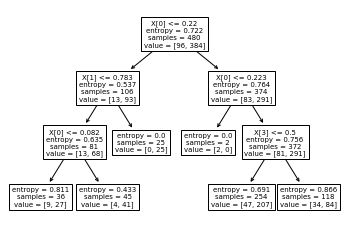

In [52]:
tree.plot_tree(model)

In [55]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1.0    120
dtype: int64

In [56]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [57]:
pd.crosstab(y_test,preds)

col_0,1.0
TaxInc_Good,
0.0,28
1.0,92


In [58]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [62]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667

In [67]:
#RANDOM FOREST ALGORITHM


from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [68]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

2

In [69]:
model.n_outputs_

1

In [70]:
model.oob_score_

0.6979166666666666

In [71]:
prediction = model.predict(x_train)

In [72]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [73]:
np.mean(prediction == y_train)

0.9875